# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [606]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [607]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m')

In [608]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [609]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [610]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

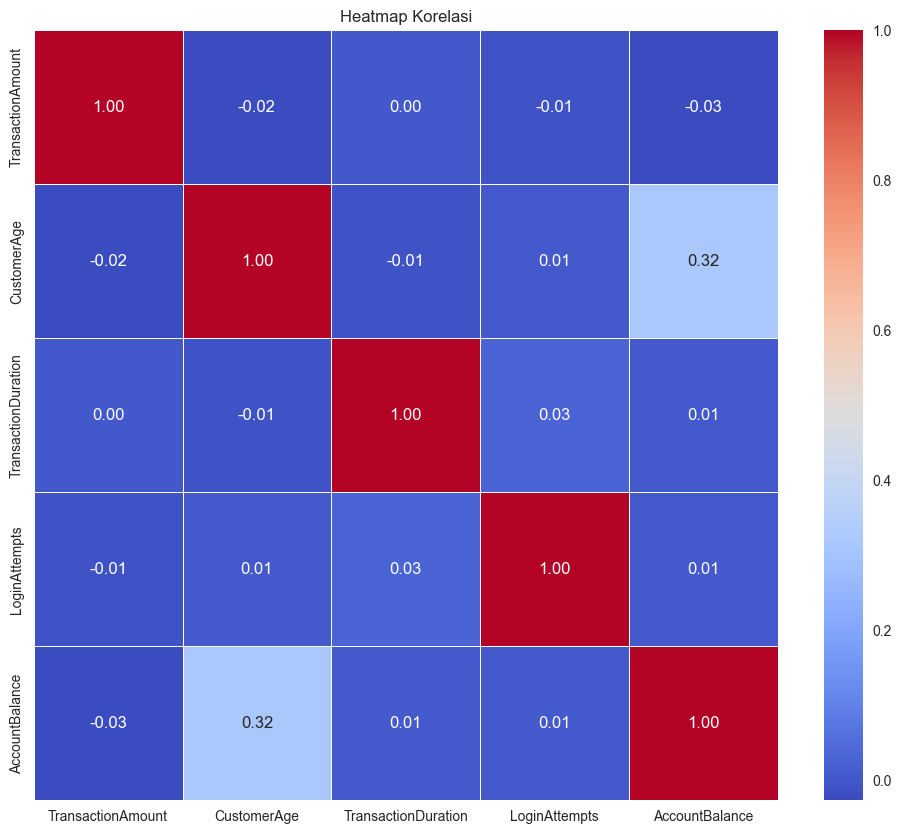

In [611]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12, 10))
num_features = df.select_dtypes(include=['number'])
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# Alasan Penggunaan:
# Analisis korelasi penting untuk mengetahui hubungan antar fitur numerik dalam dataset. 
# Korelasi tinggi antar fitur dapat mengindikasikan adanya redundansi data, sedangkan korelasi rendah menunjukkan fitur yang saling independen.

# Hasil yang Didapatkan:
# 1. Nilai korelasi mayoritas mendekati 0
#   - TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance sebagian besar tidak memiliki hubungan linear yang kuat.
# Contoh: TransactionAmount dengan CustomerAge = -0.024 → hubungan sangat lemah (hampir tidak ada).
# 2. Korelasi paling menonjol
#   - CustomerAge dengan AccountBalance = 0.32 → ada hubungan positif sedang. Artinya, semakin tua usia nasabah, cenderung saldo rekeningnya lebih tinggi (meskipun tidak terlalu kuat).
# 3. Tidak ada korelasi negatif yang signifikan
#   - Semua nilai negatif sangat kecil (misalnya TransactionAmount vs AccountBalance = -0.026), jadi pada dasarnya bisa dianggap tidak ada hubungan linear.
# 4. Interpretasi umum
#   - Hampir semua fitur relatif independen satu sama lain → bagus untuk model machine learning, karena berarti tidak ada multikolinearitas tinggi.
#   - Namun, hubungan CustomerAge–AccountBalance bisa jadi insight yang relevan untuk analisis lebih lanjut.

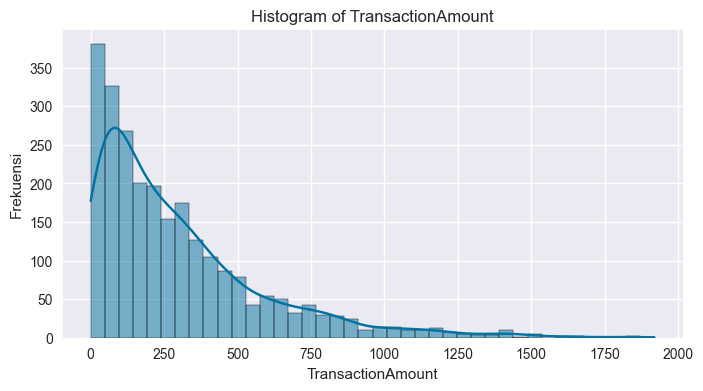

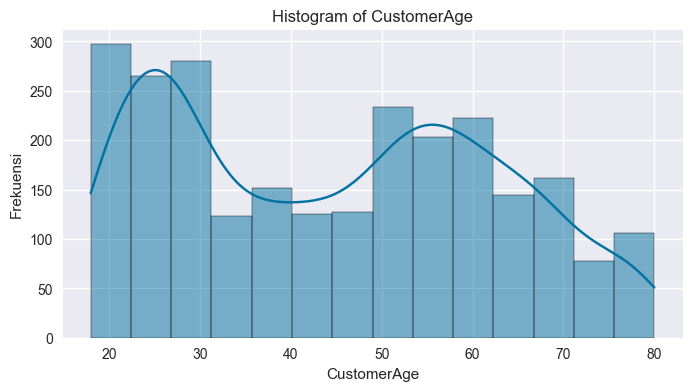

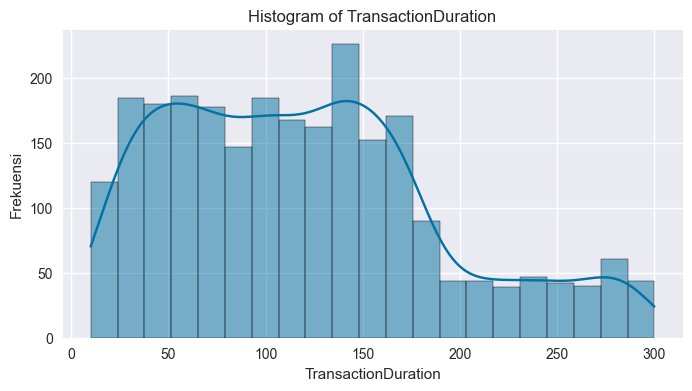

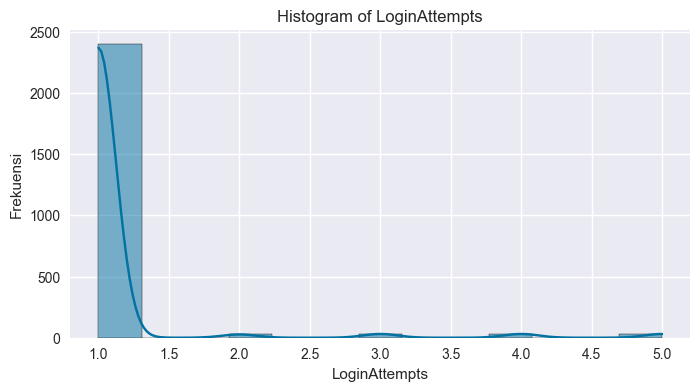

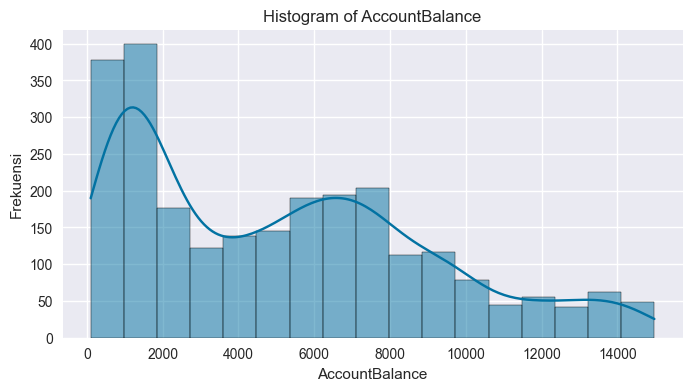

In [612]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
plt.style.use('seaborn-v0_8-darkgrid')
for i in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[i], kde=True)
    plt.title(f"Histogram of {i}")
    plt.xlabel(i)
    plt.ylabel("Frekuensi")
    plt.show()

# Alasan Penggunaan:
# Histogram digunakan untuk melihat distribusi data pada setiap fitur numerik. 
# Dengan visualisasi ini, kita dapat mengidentifikasi pola, outlier, dan sebaran nilai pada masing-masing fitur.
# Histogram juga membantu memahami apakah data terdistribusi normal, skewed, atau memiliki banyak nilai ekstrim,
# sehingga sangat relevan untuk proses analisis data sebelum melakukan clustering.

# Hasil yang Didapatkan:
# Setelah histogram ditampilkan, terlihat bahwa setiap fitur numerik memiliki pola distribusi yang berbeda.
# Beberapa fitur menunjukkan distribusi miring (skewed) misalnya TransactionAmount dan AccountBalance, yang memiliki banyak nilai rendah dan beberapa nilai tinggi.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22028\1630210831.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette='Set2')


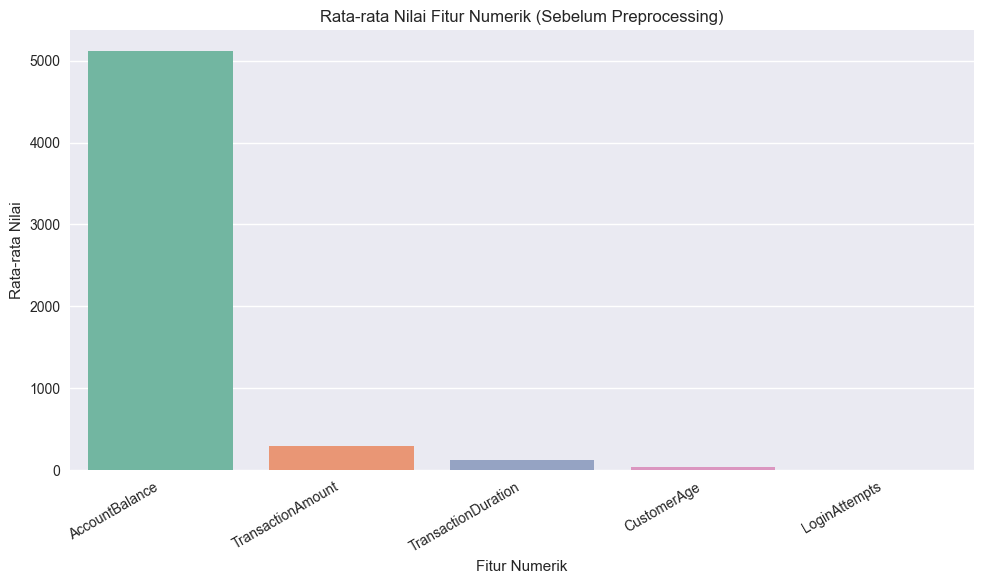

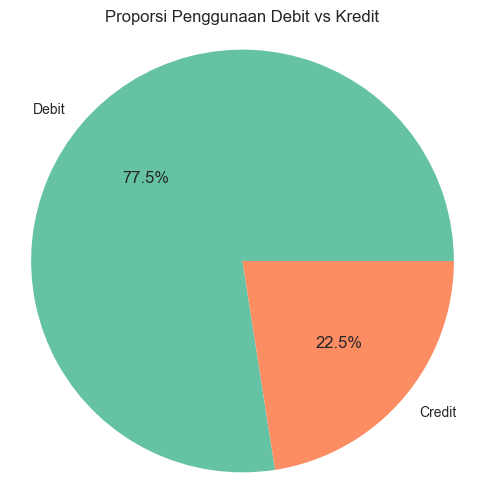

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22028\1630210831.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Set2')


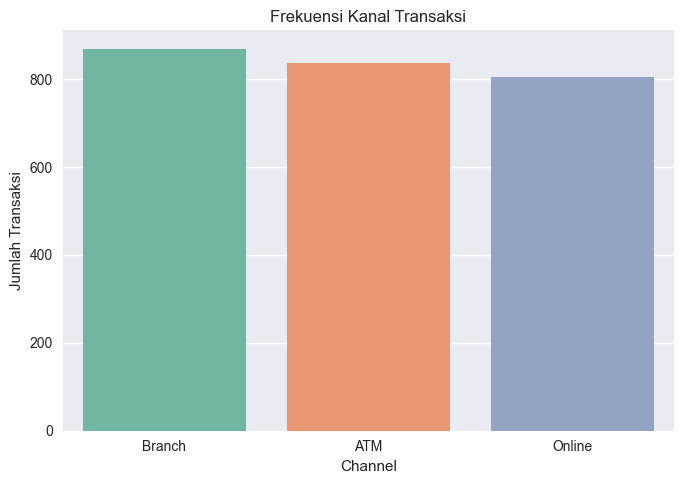

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22028\1630210831.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occ_counts.index, y=occ_counts.values, palette='Set2')


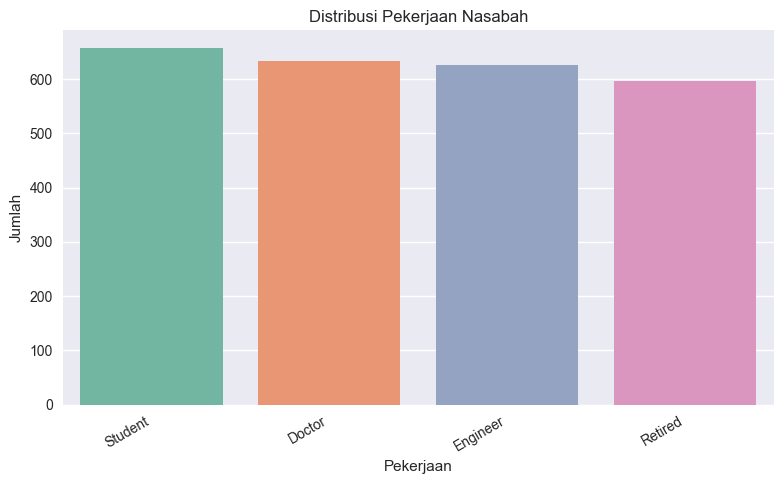

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Bar chart rata-rata fitur numerik
plt.figure(figsize=(10, 6))
num_cols = df.select_dtypes(include=['number']).columns
mean_values = df[num_cols].mean().sort_values(ascending=False)
sns.barplot(x=mean_values.index, y=mean_values.values, palette='Set2')
plt.title('Rata-rata Nilai Fitur Numerik (Sebelum Preprocessing)')
plt.xlabel('Fitur Numerik')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Pie chart penggunaan Debit vs Kredit
if 'TransactionType' in df.columns:
    plt.figure(figsize=(6, 6))
    type_counts = df['TransactionType'].value_counts()
    plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title('Proporsi Penggunaan Debit vs Kredit')
    plt.axis('equal')
    plt.show()

# Bar chart kanal transaksi (Channel)
if 'Channel' in df.columns:
    plt.figure(figsize=(7, 5))
    channel_counts = df['Channel'].value_counts()
    sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Set2')
    plt.title('Frekuensi Kanal Transaksi')
    plt.xlabel('Channel')
    plt.ylabel('Jumlah Transaksi')
    plt.tight_layout()
    plt.show()

# Bar chart pekerjaan nasabah (CustomerOccupation)
if 'CustomerOccupation' in df.columns:
    plt.figure(figsize=(8, 5))
    occ_counts = df['CustomerOccupation'].value_counts()
    sns.barplot(x=occ_counts.index, y=occ_counts.values, palette='Set2')
    plt.title('Distribusi Pekerjaan Nasabah')
    plt.xlabel('Pekerjaan')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [614]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()


TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [615]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 21


In [616]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
numerical_cols = numeric_cols.copy() #unutuk invers
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [617]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'], axis=1)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [618]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include=['object']).columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [619]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [620]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df['TransactionAmount'].fillna(df['TransactionAmount'].median(), inplace=True)
df['CustomerAge'].fillna(df['CustomerAge'].median(), inplace=True)
df['TransactionDuration'].fillna(df['TransactionDuration'].median(), inplace=True)
df['LoginAttempts'].fillna(df['LoginAttempts'].median(), inplace=True)
df['AccountBalance'].fillna(df['AccountBalance'].median(), inplace=True)
df.isnull().sum()

# Alasan Penggunaan:
# Penggunaan median untuk imputasi data hilang karena median lebih tahan terhadap outlier dibandingkan mean.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22028\3496332000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TransactionAmount'].fillna(df['TransactionAmount'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22028\3496332000.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [621]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()
print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())

Jumlah data duplikat setelah dihapus: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [622]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numeric_cols = df.select_dtypes(include=['number']).columns
outlier_indices = set()
for col in numeric_cols:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_indices.update(outliers.index)

# Menampilkan data outlier saja
outlier_df = df.loc[list(outlier_indices)]
outlier_df

# Menghapus outlier dari DataFrame
df = df.drop(outlier_indices)
df.describe()

# Metode yang digunakan 
# IQR (Interquartile Range)

# Alasan Penggunaan:
# IQR efektif untuk mengidentifikasi outlier pada data numerik tanpa terpengaruh oleh nilai ekstrim.

# Hasil yang Didapatkan:
# Setelah outlier dihapus jumlah data berkurang menjadi 1743 baris.

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,1743.000000,1743.000000,1743.0,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.0,1743.000000,1743.00000
mean,0.129972,1241.395295,1.0,21.288583,0.925990,0.424907,1.529547,0.375797,0.0,0.335528,181.78887
std,0.110533,729.014753,0.0,12.375159,0.841467,0.284644,1.150108,0.242095,0.0,0.256957,103.60451
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
25%,0.040272,614.500000,1.0,11.000000,0.000000,0.145161,1.000000,0.182759,0.0,0.094310,94.00000
50%,0.101160,1233.000000,1.0,21.000000,1.000000,0.419355,2.000000,0.351724,0.0,0.311416,182.00000
75%,0.189882,1872.500000,1.0,32.000000,2.000000,0.645161,3.000000,0.524138,0.0,0.504013,271.00000
max,0.467223,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.00000


In [623]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

df['TransactionAmount_bin'] = pd.cut(df['TransactionAmount'], bins=[0, 0.1, 0.2, 0.5], labels=['Low', 'Medium', 'High'])
# 0–0.1: transaksi kecil (Low)
# 0.1–0.2: transaksi sedang (Medium)
# 0.2–0.5: transaksi besar (High)
df['CustomerAge_bin'] = pd.cut(df['CustomerAge'], bins=[0, 0.3, 0.7, 1.0], labels=['Young', 'Adult', 'Senior'])
# 0–0.3: Young (muda)
# 0.3–0.7: Adult (dewasa)
# 0.7–1.0: Senior (lanjut usia)
le_bin = LabelEncoder()
df['TransactionAmount_bin'] = le_bin.fit_transform(df['TransactionAmount_bin'])
df['CustomerAge_bin'] = le_bin.fit_transform(df['CustomerAge_bin'])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1,1
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2,1
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1,2
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1,3


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [624]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin
count,1743.000000,1743.000000,1743.0,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.0,1743.000000,1743.00000,1743.000000,1743.000000
mean,0.129972,1241.395295,1.0,21.288583,0.925990,0.424907,1.529547,0.375797,0.0,0.335528,181.78887,1.041308,1.026965
std,0.110533,729.014753,0.0,12.375159,0.841467,0.284644,1.150108,0.242095,0.0,0.256957,103.60451,0.710357,0.926623
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
25%,0.040272,614.500000,1.0,11.000000,0.000000,0.145161,1.000000,0.182759,0.0,0.094310,94.00000,1.000000,0.000000
50%,0.101160,1233.000000,1.0,21.000000,1.000000,0.419355,2.000000,0.351724,0.0,0.311416,182.00000,1.000000,1.000000
75%,0.189882,1872.500000,1.0,32.000000,2.000000,0.645161,3.000000,0.524138,0.0,0.504013,271.00000,2.000000,2.000000
max,0.467223,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.00000,3.000000,3.000000


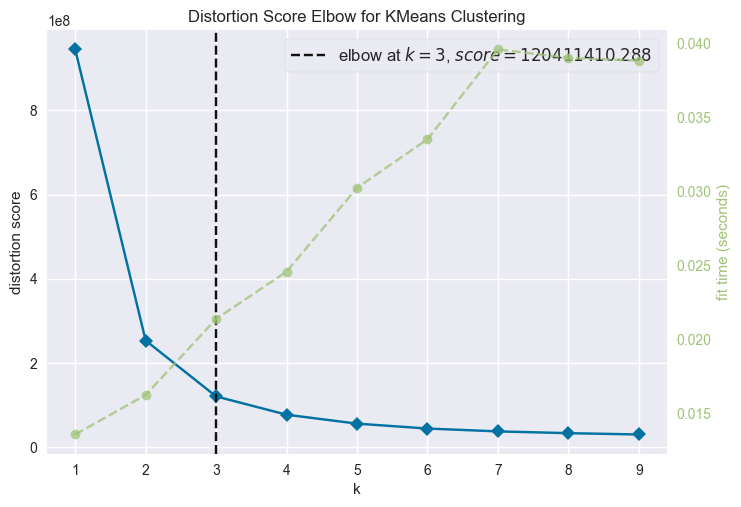

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [625]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [626]:
# Menggunakan algoritma K-Means Clustering
k = visualizer.elbow_value_
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=30)
kmeans_model.fit(df)
print("Kmeans dengan n_clusters =", k)

Kmeans dengan n_clusters = 3


Jalankan cell code ini untuk menyimpan model kamu.

In [627]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans_model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [628]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = kmeans_model.labels_
score = silhouette_score(df, labels)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.5454329074027642


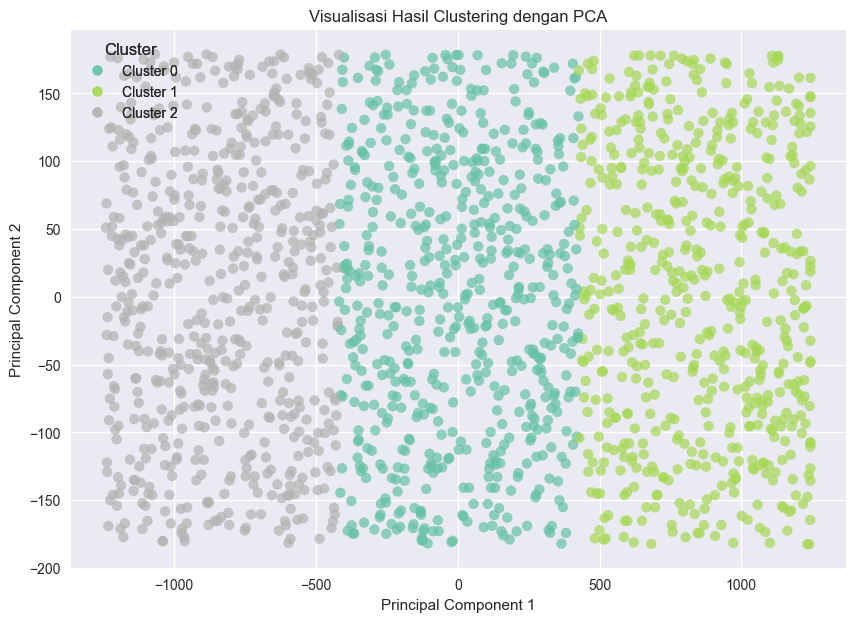

In [629]:
# Membuat visualisasi hasil clustering
pca_model = PCA(n_components=2)
pca_components = pca_model.fit_transform(df)
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(
    pca_components[:, 0], 
    pca_components[:, 1], 
    c=kmeans_model.labels_, 
    cmap='Set2', 
    s=50, 
    alpha=0.7
)
legend_labels = [f'Cluster {i}' for i in range(len(set(kmeans_model.labels_)))]
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Cluster')
ax.add_artist(legend)
ax.set_title('Visualisasi Hasil Clustering dengan PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [630]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_2 = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
a = KMeans(n_clusters=k, random_state=42, n_init=30)
a.fit(PCA_2)

print("Model KMeans dengan data PCA berhasil dibuat dan dilatih.")

Model KMeans dengan data PCA berhasil dibuat dan dilatih.


In [631]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(pca, "PCA_model_clustering.h5")

print("Model PCA berhasil disimpan.")

Model PCA berhasil disimpan.


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [632]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df['cluster'] = kmeans_model.labels_
numeric_features = df.select_dtypes(include=['number']).columns.drop('cluster')
summary = df.groupby('cluster')[numeric_features].agg(['mean', 'min', 'max', 'std'])
with pd.option_context('display.max_columns', None):
    display(summary)

TransactionAmount                               TransactionDate        \
                     mean       min       max       std            mean   min   
cluster                                                                         
0                0.129534  0.000031  0.463168  0.112027     1240.910321   823   
1                0.130735  0.000000  0.467223  0.108863     2094.947461  1668   
2                0.129668  0.000313  0.457759  0.110816      403.027539     0   

                          TransactionType                Location          \
          max         std            mean min max  std       mean min max   
cluster                                                                     
0        1667  241.804390             1.0   1   1  0.0  21.407783   0  43   
1        2485  243.866301             1.0   1   1  0.0  21.553415   0  43   
2         822  238.701767             1.0   1   1  0.0  20.907057   0  43   

                     Channel                   CustomerAge            \
               std      mean min max       std        mean  min  max   
cluster                                                                
0        12.602039  0.900169   0   3  0.840813    0.438950  0.0  1.0   
1        12.394475  0.970228   0   3  0.844480    0.430484  0.0  1.0   
2        12.132955  0.908778   0   3  0.838888    0.405141  0.0  1.0   

                  CustomerOccupation                   TransactionDuration  \
              std               mean min max       std                mean   
cluster                                                                      
0        0.289497           1.587140   0   4  1.141856            0.383920   
1        0.281869           1.493870   0   4  1.147636            0.376146   
2        0.281760           1.506024   0   4  1.160580            0.367191   

                                      LoginAttempts                 \
              min       max       std          mean  min  max  std   
cluster                                                              
0        0.003448  0.996552  0.241367           0.0  0.0  0.0  0.0   
1        0.000000  1.000000  0.239273           0.0  0.0  0.0  0.0   
2        0.000000  0.996552  0.245689           0.0  0.0  0.0  0.0   

        AccountBalance                               PreviousTransactionDate  \
                  mean       min       max       std                    mean   
cluster                                                                        
0             0.321171  0.001125  0.995087  0.252165              179.502538   
1             0.352297  0.000000  1.000000  0.258600              183.971979   
2             0.333652  0.000064  0.997633  0.259642              181.969019   

                             TransactionAmount_bin                    \
        min  max         std                  mean min max       std   
cluster                                                                
0         0  360  102.725814              1.035533   0   2  0.703808   
1         0  360  104.657449              1.049037   0   3  0.723814   
2         0  360  103.584643              1.039587   0   2  0.704774   

        CustomerAge_bin                    
                   mean min max       std  
cluster                                    
0              1.021997   0   3  0.919390  
1              0.970228   0   3  0.925747  
2              1.087780   0   3  0.932667

#### **Cluster 0**
- **Rata-rata Usia Nasabah (CustomerAge):** `0.4389` (sedikit di atas rata-rata populasi).  
- **Rata-rata Jumlah Transaksi (TransactionAmount):** `0.1295` (sangat dekat dengan rata-rata).  
- **Rata-rata Saldo Akun (AccountBalance):** `0.3212` (sedikit di atas rata-rata).  
- **Rata-rata Durasi Transaksi (TransactionDuration):** `0.3839` (sedikit lebih lama dari rata-rata).  

**Analisis:**  
Cluster ini menunjukkan profil nasabah yang **cukup tipikal**, dengan semua nilai fitur dekat ke rata-rata. Usia dan saldo sedikit lebih tinggi, menandakan kelompok ini relatif stabil secara finansial. Mereka dapat dianggap sebagai **nasabah moderat** dengan risiko rendah.

---

#### **Cluster 1**
- **Rata-rata Usia Nasabah (CustomerAge):** `0.4305` (sedikit di atas rata-rata).  
- **Rata-rata Jumlah Transaksi (TransactionAmount):** `0.1307` (dekat dengan rata-rata populasi).  
- **Rata-rata Saldo Akun (AccountBalance):** `0.3523` (**paling tinggi** dibanding cluster lain).  
- **Rata-rata Durasi Transaksi (TransactionDuration):** `0.3761` (sedikit lebih lama dari rata-rata).  

**Analisis:**  
Cluster ini menonjol karena **saldo akun lebih tinggi** dibanding cluster lain. Usia dan jumlah transaksi tetap mendekati rata-rata, sehingga kelompok ini adalah **nasabah produktif dengan kapasitas finansial lebih baik**. Potensi besar untuk dijadikan target layanan premium atau loyalitas.

---

#### **Cluster 2**
- **Rata-rata Usia Nasabah (CustomerAge):** `0.4051` (sedikit di bawah rata-rata populasi).  
- **Rata-rata Jumlah Transaksi (TransactionAmount):** `0.1297` (sangat dekat dengan rata-rata).  
- **Rata-rata Saldo Akun (AccountBalance):** `0.3337` (sedikit lebih tinggi dari cluster 0).  
- **Rata-rata Durasi Transaksi (TransactionDuration):** `0.3672` (sedikit lebih cepat dibanding cluster lain).  

**Analisis:**  
Nasabah di cluster ini cenderung **lebih muda** dibandingkan cluster lain, dengan saldo yang cukup baik dan durasi transaksi relatif lebih singkat. Hal ini mengindikasikan perilaku yang **lebih aktif atau efisien** dalam bertransaksi.  Durasi transaksi yang lebih singkat bisa menandakan penggunaan **channel otomatis (misalnya mobile/ATM)**. Bila pola waktu transaksi tiba-tiba berubah (misalnya transaksi online di jam tidak biasa), hal itu bisa menjadi **indikasi fraud atau anomali**.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [633]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'cluster': 'Target'})
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1,1,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2,1,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1,2,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1,2,2
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1,3,2


In [634]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [635]:
# inverse dataset ke rentang normal untuk numerikal
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1,1,2
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2,1,0
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1,2,0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,1,2,2
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,1,3,2


In [636]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_cols:
    encoder = encoders[col]
    df[col] = encoder.inverse_transform(df[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1,1,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2,1,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1,2,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,1,2,2
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,1,3,2


In [637]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

number_cols_inv = df.select_dtypes(include='number').columns.drop('Target')
categorical_cols_inv = df.select_dtypes(include=['object', 'category']).columns

agg_dict = {col: ['mean', 'min', 'max'] for col in number_cols_inv}
agg_dict.update({col: (lambda x: x.mode()[0]) for col in categorical_cols_inv})

cluster_summary_inverse = df.groupby('Target').agg(agg_dict)

with pd.option_context('display.max_columns', None):
    display(cluster_summary_inverse)

TransactionAmount               CustomerAge              \
                    mean   min     max        mean   min   max   
Target                                                           
0             248.816548  0.32  889.01   45.214890  18.0  80.0   
1             251.121454  0.26  896.79   44.690018  18.0  80.0   
2             249.073804  0.86  878.63   43.118761  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               121.336717  11.0  299.0           1.0  1.0  1.0   
1               119.082312  10.0  300.0           1.0  1.0  1.0   
2               116.485370  10.0  299.0           1.0  1.0  1.0   

       AccountBalance                   TransactionAmount_bin          \
                 mean     min       max                  mean min max   
Target                                                                  
0         4879.227513  117.98  14904.90              1.035533   0   2   
1         5342.288039  101.25  14977.99              1.049037   0   3   
2         5064.909260  102.20  14942.78              1.039587   0   2   

       CustomerAge_bin              TransactionDate TransactionType  \
                  mean min max             <lambda>        <lambda>   
Target                                                                
0             1.021997   0   3  2023-05-05 17:32:18           Debit   
1             0.970228   0   3  2023-12-28 17:31:03           Debit   
2             1.087780   0   3  2023-01-02 16:00:06           Debit   

                Location  Channel CustomerOccupation PreviousTransactionDate  
                <lambda> <lambda>           <lambda>                <lambda>  
Target                                                                        
0                 Fresno      ATM            Student     2024-11-04 08:07:18  
1       Colorado Springs      ATM             Doctor     2024-11-04 08:11:35  
2              Charlotte      ATM            Student     2024-11-04 08:10:23

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
#### **Cluster 0**
- **Rata-rata Usia Nasabah (CustomerAge):** 45 tahun  
- **Rata-rata Jumlah Transaksi (TransactionAmount):** \$248.82  
- **Rata-rata Saldo Akun (AccountBalance):** \$4,879.23  
- **Durasi Transaksi Rata-rata (TransactionDuration):** 121 detik  
- **Pekerjaan Dominan (CustomerOccupation):** Student  
- **Jenis Transaksi Dominan (TransactionType):** Debit  
- **Channel Transaksi Dominan:** ATM  

**Analisis:**  
Nasabah pada cluster ini mayoritas **usia paruh baya (±45 tahun)** dengan saldo moderat (~\$4.9k) dan transaksi harian sekitar \$249. Pekerjaan dominan adalah pelajar/mahasiswa, dengan penggunaan channel ATM dan jenis transaksi debit. Durasi transaksi berada di kisaran normal, sehingga kelompok ini tergolong **nasabah stabil dengan risiko rendah**.

---

#### **Cluster 1**
- **Rata-rata Usia Nasabah (CustomerAge):** 44 tahun  
- **Rata-rata Jumlah Transaksi (TransactionAmount):** \$251.12  
- **Rata-rata Saldo Akun (AccountBalance):** \$5,342.29 (**paling tinggi**)  
- **Durasi Transaksi Rata-rata (TransactionDuration):** 119 detik  
- **Pekerjaan Dominan (CustomerOccupation):** Doctor  
- **Jenis Transaksi Dominan (TransactionType):** Debit  
- **Channel Transaksi Dominan:** ATM  

**Analisis:**  
Cluster ini berisi nasabah dengan **saldo akun terbesar (~\$5.3k)**. Mereka rata-rata berusia 44 tahun, dengan jumlah transaksi harian sekitar \$251. Dominasi pekerjaan sebagai dokter menunjukkan **nasabah dengan tingkat finansial lebih baik**, sehingga potensial untuk **penawaran produk premium**. Channel utama tetap ATM dengan transaksi debit.

---

#### **Cluster 2**
- **Rata-rata Usia Nasabah (CustomerAge):** 43 tahun (**paling muda**)  
- **Rata-rata Jumlah Transaksi (TransactionAmount):** \$249.07  
- **Rata-rata Saldo Akun (AccountBalance):** \$5,064.91  
- **Durasi Transaksi Rata-rata (TransactionDuration):** 116 detik (**paling cepat**)  
- **Pekerjaan Dominan (CustomerOccupation):** Student  
- **Jenis Transaksi Dominan (TransactionType):** Debit  
- **Channel Transaksi Dominan:** ATM  

**Analisis:**  
Cluster ini didominasi nasabah **lebih muda** dengan saldo rata-rata menengah (~\$5.0k). Jumlah transaksi mendekati cluster lain, namun durasi transaksi lebih singkat, yang mencerminkan **nasabah aktif dan efisien**. Aktivitas transaksi yang lebih singkat rawan disalahgunakan untuk **phishing atau penipuan channel ATM/mobile**. Perlu monitoring untuk mendeteksi pola login abnormal atau percobaan login berulang.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [638]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

# Buat salinan dataframe yang sudah bersih 
df_inverse = df.copy()

# Tambahkan label cluster ke dataframe ini 
if 'Target' in df_inverse.columns:
    df_inverse['Cluster'] = df_inverse['Target']
elif 'cluster' in df_inverse.columns:
    df_inverse['Cluster'] = df_inverse['cluster']
else:
    df_inverse['Cluster'] = kmeans_model.labels_

# Lakukan inverse transform hanya pada kolom numerik yang di-scaling awal
numeric_cols_for_inverse = [col for col in numerical_cols if col in df_inverse.columns]
df_inverse[numeric_cols_for_inverse] = scaler.inverse_transform(df_inverse[numeric_cols_for_inverse])

# Tampilkan 5 baris pertama 
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Target,Cluster
0,27036.8565,2023-04-11 16:29:14,Debit,San Diego,ATM,4358.0,Doctor,23500.0,5.0,7.605312e+07,2024-11-04 08:08:08,1,1,2,2
1,721948.3840,2023-06-27 16:44:19,Debit,Houston,ATM,4234.0,Doctor,40900.0,5.0,2.046878e+08,2024-11-04 08:09:35,2,1,0,0
2,242331.8265,2023-07-10 18:16:08,Debit,Mesa,Online,1196.0,Student,16250.0,5.0,1.669701e+07,2024-11-04 08:07:04,1,2,0,0
3,354028.0850,2023-05-05 16:32:11,Debit,Raleigh,Online,1630.0,Student,7260.0,5.0,1.274798e+08,2024-11-04 08:09:06,1,2,2,2
5,176822.2875,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,1134.0,Student,49890.0,5.0,1.162895e+07,2024-11-04 08:06:36,1,3,2,2


In [639]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.